In [1]:
import numpy as np
import pandas as pd

## Step 1: Dataset Selection

##### We are going to use the "Online Retail Dataset" from the UCI Machine Learning Repository. This dataset contains transactional data for a UK-based online retail store, including details like customer IDs, products purchased, and transaction timestamps.

## Step 2: Data Cleaning and Preprocessing


#### Tasks:
- Load the dataset into a Pandas DataFrame.
- Handle missing values (e.g., customer IDs may be missing).
- Remove duplicate or irrelevant data (e.g., transactions with negative quantities).
- Format date columns into proper datetime objects.

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [3]:
# Preview the data
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Check for missing values

print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [41]:
# Handling missing values

df = df.dropna(subset=['CustomerID'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,12


In [42]:
# Preview transactions with negative quantity

negative_transactions = df[df['Quantity'] < 0]
print(negative_transactions)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total Price, DayOfWeek, Hour]
Index: []


In [43]:
# Remove Transactions with negative quantities

df = df[df['Quantity'] > 0]

In [44]:
# Convert InvoiceDate to datetime

df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [46]:
# print summary of the cleaner dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Total Price  397924 non-null  float64       
 9   DayOfWeek    397924 non-null  object        
 10  Hour         397924 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(5)
memory usage: 34.9+ MB
None


## Step 3: Exploratory Data Analysis (EDA)

#### Tasks:
- Perform descriptive statistics on numerical columns.
- Analyze the top-selling products and top customers.
- Identify trends in sales over time.

In [47]:
# Descriptive statistics
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID    Total Price           Hour  
count  397924.000000  397924.000000  397924.000000  
mean    15294.315171      22.394749      12.728247  
min     12346.000000       0.000000       6.000000  
25%     13969.000000       4.680000      11.000000  
50%     15159.000000      11.800000      13.000000  
75%     16795.000000      19.800000      14.000000 

In [48]:
# Top 5 best-selling products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print('Top Products : \n', top_products)


Top Products : 
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
Name: Quantity, dtype: int64


In [24]:
# Top 5 customers by total spend

df['Total Price'] = df['Quantity']*df['UnitPrice']
top_customers = df.groupby('CustomerID')['Total Price'].sum().sort_values(ascending=False).head(5)

print('Top Customers : \n', top_customers)

Top Customers : 
 CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: Total Price, dtype: float64


<ipython-input-24-85719df7e73a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Price'] = df['Quantity']*df['UnitPrice']


In [49]:
# Sales trends over time
sales_trends = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Total Price'].sum()
print('Monthly Sales Trends : \n', sales_trends)

Monthly Sales Trends : 
 InvoiceDate
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: Total Price, dtype: float64


## Step 4: Feature Engineering

- Add new features like "Day of Week", "Hour of Purchase", or customer segmentation.

In [30]:
# Add new features

df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

<ipython-input-30-3a549b5c98ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
<ipython-input-30-3a549b5c98ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['InvoiceDate'].dt.hour


In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,12


In [50]:
# Customer segmentation: Total spending per customer

customer_segments = df.groupby('CustomerID')['Total Price'].sum()
print(customer_segments)
customer_segments = pd.qcut(customer_segments, 4, labels=['Low', 'Medium', 'High', 'Very High'])
print(customer_segments.value_counts())

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total Price, Length: 4339, dtype: float64
Total Price
Low          1085
Medium       1085
Very High    1085
High         1084
Name: count, dtype: int64


## Step 5: Insights and Reporting
#### Create visualizations:
- Use Matplotlib/Seaborn for bar charts, line graphs, and pie charts.

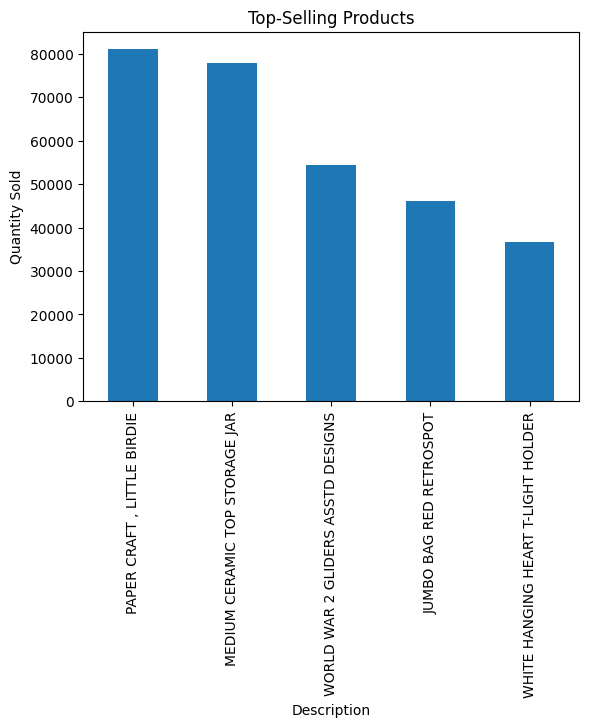

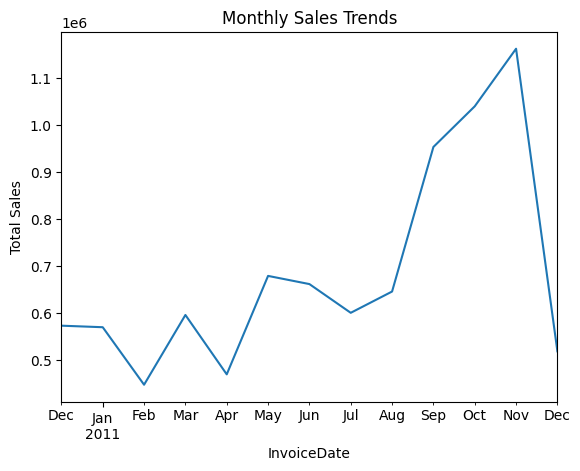

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot top-selling products
top_products.plot(kind='bar', title='Top-Selling Products')
plt.ylabel('Quantity Sold')
plt.show()

# Plot monthly sales trends
sales_trends.plot(kind='line', title='Monthly Sales Trends')
plt.ylabel('Total Sales')
plt.show()